In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import f1_score,precision_recall_curve
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Install cassandra-driver to connect jupyter notebook with DataStax to gather data form it.


In [2]:
credit_data= pd.read_csv("/Users/ganeshjadhav/Desktop/ML_Projects/LiveClass/Notebooks2/CreditCardData.csv")

In [3]:
X= credit_data.drop('Class', axis= 1)
y= credit_data['Class']

In [4]:
#Feature EngineeringPowerTransformer
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
df = power.fit_transform(X)

In [5]:
df= pd.DataFrame(data= df, columns= X.columns)

In [6]:
print(df.head())
print(df.shape)

       Time        V1        V2        V3        V4        V5        V6  \
0 -2.412968 -1.098091  0.899669 -0.853623  1.828163 -0.294664 -1.029474   
1 -2.408147 -1.285209 -1.702840  0.722170  1.177573  0.853147 -0.714194   
2 -2.206409 -1.095674  0.803819 -0.338749  1.194679 -0.452218  0.081214   
3 -2.106188 -1.583982  0.604075 -1.159258  1.335503 -0.608697 -1.280729   
4 -2.086232  0.675519  1.428808 -1.588434  2.082262  2.487024 -0.968668   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -1.209057  0.825528 -1.884694  ...  0.135883  0.476663 -0.072812 -0.717845   
1  0.210144 -0.103058 -0.179657  ...  2.682045  0.607316  0.551213  2.114744   
2  0.382627 -0.293461 -0.155193  ... -0.578592 -0.290255 -1.205767  0.259359   
3 -1.561190 -0.207996 -0.162321  ... -0.247317  0.527786  0.205651 -0.673522   
4  1.357609 -0.347980 -0.901690  ... -0.015470 -0.374208 -0.923202 -1.010422   

        V24       V25       V26       V27       V28    Amount  
0  0

Now we can see after using power transformation data became symmetric

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [8]:
smt = SMOTE(random_state=2425, n_jobs=-1,sampling_strategy='auto', k_neighbors=5)
X_sm, y_sm = smt.fit_resample(df, y)
print('Resampled dataset shape {}'.format(Counter(y_sm)))
print('Before Resampled dataset shape {}'.format(Counter(y)))

Resampled dataset shape Counter({1: 10000, 0: 10000})
Before Resampled dataset shape Counter({0: 10000, 1: 492})


<AxesSubplot:ylabel='count'>

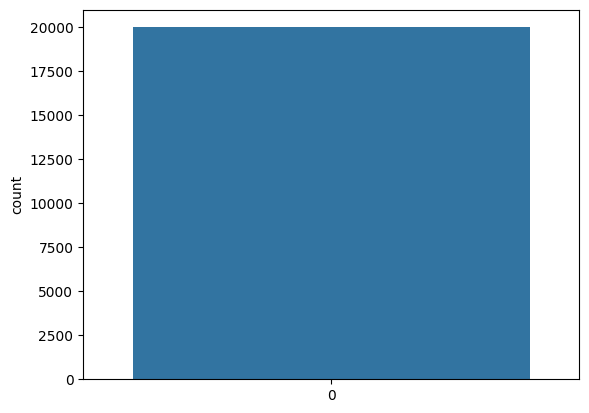

In [9]:
sns.countplot(y_sm)

Oversampling Undersampling SMOTE - Out of all these three SMOTE is the most effective so we will go with it, In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.

#Model building

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.30, random_state = 440)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14000, 30)
(14000,)
(6000, 30)
(6000,)


Pipelines Creation

1. Data Preprocessing by using Standard Scaler
2. Reduce Dimension using PCA
3. Apply  Classifier

In [11]:
from sklearn.pipeline import Pipeline

In [12]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [13]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [14]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [15]:
pipeline_Knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('rf_classifier',KNeighborsClassifier())])

In [16]:
pipeline_Gdb=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA(n_components=2)),
                     ('rf_classifier',GradientBoostingClassifier())])

In [17]:
pipeline_Adb=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',AdaBoostClassifier())])

In [18]:
## Lets make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_Knn, pipeline_Gdb,pipeline_Adb]


In [19]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [20]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',
             3: "KNN", 4: 'GradientBoosting ' , 5: 'AdaBoost'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y_train)

In [21]:
for i,model in enumerate(pipelines):
    print("{} Train Accuracy: {}".format(pipe_dict[i],model.score(x_train,y_train)))

Logistic Regression Train Accuracy: 0.9004285714285715
Decision Tree Train Accuracy: 0.9999285714285714
RandomForest Train Accuracy: 0.9999285714285714
KNN Train Accuracy: 0.9336428571428571
GradientBoosting  Train Accuracy: 0.9182857142857143
AdaBoost Train Accuracy: 0.9123571428571429


In [22]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

Logistic Regression Test Accuracy: 0.9008333333333334
Decision Tree Test Accuracy: 0.8826666666666667
RandomForest Test Accuracy: 0.9138333333333334
KNN Test Accuracy: 0.9043333333333333
GradientBoosting  Test Accuracy: 0.9116666666666666
AdaBoost Test Accuracy: 0.9093333333333333


In [23]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


#Classification Report

In [24]:
from sklearn.metrics import classification_report, f1_score

models2= []
models3= []
for i, model in enumerate(pipelines):
    pred = model.predict(x_test)
    Class_Report=classification_report(y_test, pred)
    models2.append(Class_Report)
    print("Model Name :",model,"\n",Class_Report)
    f1sc=f1_score(y_test, pred, average='weighted')
    models3.append(f1sc)
    print("Testing Accuracy of Data with Model",model,":",round(f1sc,2),"\n")

Model Name : Pipeline(steps=[('scalar1', StandardScaler()), ('pca1', PCA(n_components=2)),
                ('lr_classifier', LogisticRegression(random_state=0))]) 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2996
           1       0.99      0.81      0.89      3004

    accuracy                           0.90      6000
   macro avg       0.92      0.90      0.90      6000
weighted avg       0.92      0.90      0.90      6000

Testing Accuracy of Data with Model Pipeline(steps=[('scalar1', StandardScaler()), ('pca1', PCA(n_components=2)),
                ('lr_classifier', LogisticRegression(random_state=0))]) : 0.9 

Model Name : Pipeline(steps=[('scalar2', StandardScaler()), ('pca2', PCA(n_components=2)),
                ('dt_classifier', DecisionTreeClassifier())]) 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      2996
           1       0.89      0.88      0.88      3

In [25]:
x= X = ["Logistic Regression" , "Decision Tree","RandomForest" ,
    "KNN " , "GradientBoosting ","AdaBoost"]
d2 = {"Accuracy of Testing Data" : models3}
data_frame2 = pd.DataFrame(d2,index=X)
data_frame2

,Accuracy of Testing Data
Logistic Regression,0.899971
Decision Tree,0.882665
RandomForest,0.913647
KNN,0.904178
GradientBoosting,0.911256
AdaBoost,0.908945


#Confusion Matrix

In [26]:
cmodel=[]
for i, model in enumerate(pipelines):
    pred = model.predict(x_test)
    cm = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    cmodel.append(cm)
    

dc={"Confusion Matrix":cmodel}    
conf_mat=pd.DataFrame(dc,index=X)

conf_mat

,Confusion Matrix
Logistic Regression,"[[2426, 578], [17, 2979]]"
Decision Tree,"[[2638, 366], [338, 2658]]"
RandomForest,"[[2604, 400], [117, 2879]]"
KNN,"[[2594, 410], [164, 2832]]"
GradientBoosting,"[[2533, 471], [59, 2937]]"
AdaBoost,"[[2534, 470], [74, 2922]]"


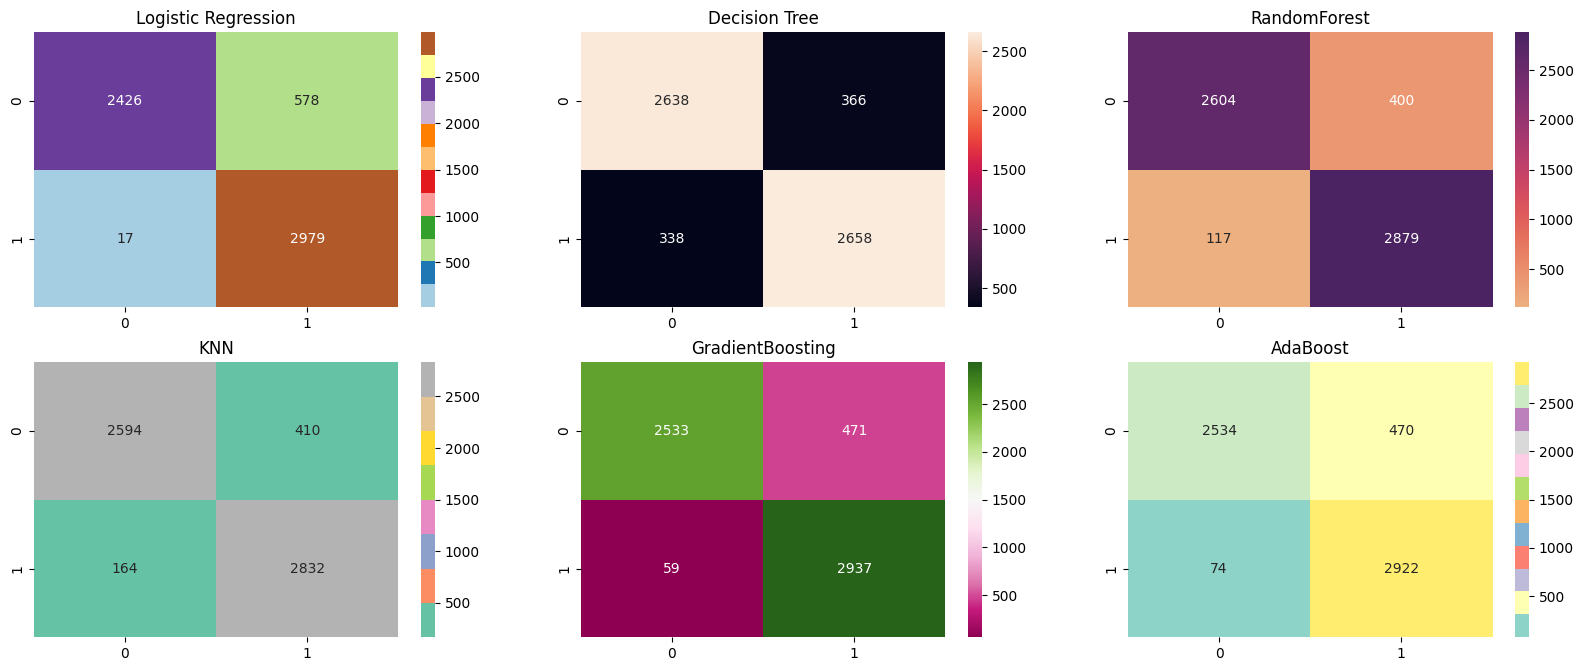

In [27]:
plt.figure(figsize=(20,25))
plt.subplot(6,3,1)
sns.heatmap(cmodel[0],annot=True,fmt='d',cmap='Paired')
plt.title("Logistic Regression")
plt.subplot(6,3,2)
sns.heatmap(cmodel[1],annot=True,fmt='g',cmap='rocket')
plt.title("Decision Tree")
plt.subplot(6,3,3)
sns.heatmap(cmodel[2],annot=True,fmt='d',cmap='flare')
plt.title("RandomForest")  
plt.subplot(6,3,4)
sns.heatmap(cmodel[3],annot=True,fmt='g',cmap='Set2')
plt.title("KNN")
plt.subplot(6,3,5)
sns.heatmap(cmodel[4],annot=True,fmt='d',cmap='PiYG')
plt.title("GradientBoosting")
plt.subplot(6,3,6)
sns.heatmap(cmodel[5],annot=True,fmt='g',cmap='Set3')
plt.title("AdaBoost")
plt.show()

#Cross_validation

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold
vmodel=[]
acvalmodel=[]

cv = RepeatedStratifiedKFold(n_splits=5, random_state=1)
for classifier, model in enumerate(pipelines):
    pred = model.predict(x_test)
    cross_val = cross_val_score(model, x_train, y_train, cv= cv, scoring='f1_weighted')
    acvalmodel.append(cross_val)
    print('Accuracy value :',cross_val)
    print('-----------------------------------')
    vmodel.append(round(cross_val.mean(),2))
    print('Final Average Accuracy :',round(cross_val.mean(),3))
    print("Final standard deviation :",cross_val.std())
    print('-----------------------------------')
    

Accuracy value : [0.90531658 0.89689122 0.90306681 0.89761226 0.89393939 0.89691979
 0.90599991 0.89541973 0.8983333  0.90054443 0.90381345 0.89426935
 0.89686221 0.89764063 0.90389499 0.89541973 0.88802579 0.90166506
 0.9122703  0.89940082 0.89099758 0.90087758 0.9049257  0.90495045
 0.89472079 0.9027392  0.89834744 0.89871491 0.89578772 0.90126512
 0.90276492 0.89755422 0.89653791 0.90053761 0.90054443 0.89906838
 0.90892838 0.88984026 0.8969339  0.90275857 0.89583135 0.90233279
 0.90204466 0.89942187 0.89544188 0.89652346 0.90089121 0.89543449
 0.90238547 0.90235279]
-----------------------------------
Final Average Accuracy : 0.899
Final standard deviation : 0.004572888744057886
-----------------------------------
Accuracy value : [0.88857075 0.8817797  0.89107005 0.87070043 0.87428546 0.87321113
 0.88678573 0.86892752 0.88571359 0.88570723 0.88464264 0.8832143
 0.88106271 0.87462215 0.880704   0.87321327 0.87249995 0.87210684
 0.90071327 0.88821256 0.88285535 0.88428241 0.8846278 

In [29]:
dv={"RepeatedStratifiedKFold":acvalmodel,"Final Average Accuracy":vmodel}    
crossval=pd.DataFrame(dv,index=X)
crossval

,RepeatedStratifiedKFold,Final Average Accuracy
Logistic Regression,"[0.9053165819029754, 0.896891220120366, 0.9030...",0.90
Decision Tree,"[0.8885707463525526, 0.881779697745922, 0.8910...",0.88
RandomForest,"[0.92237132471548, 0.9062759306480124, 0.92311...",0.92
KNN,"[0.9184478486293531, 0.9044554791003391, 0.918...",0.91
GradientBoosting,"[0.9182736984181851, 0.9110402163131374, 0.917...",0.91
AdaBoost,"[0.9115385657596393, 0.9120866185528667, 0.912...",0.91


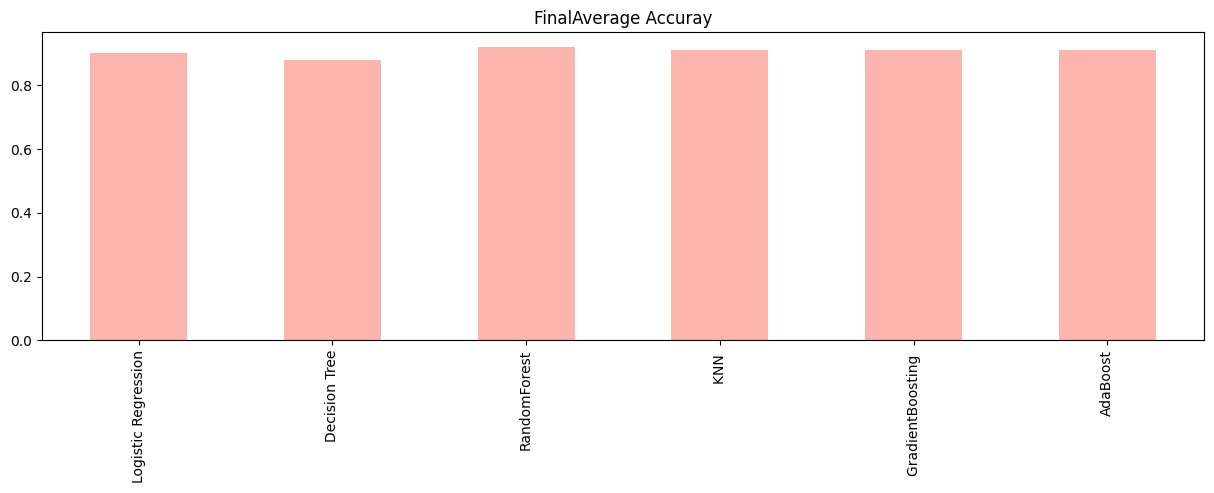

In [30]:
#cross_val['Final Average Accuracy'].plot(kind='bar')
crossval['Final Average Accuracy'].plot(kind='bar',figsize=(15,4),title='FinalAverage Accuray',colormap='Pastel1')
plt.show()